# CAR PRICE PREDICTION ML MODEL 

EDA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from xgboost import XGBRegressor
from xgboost import plot_importance


In [ ]:
# import optuna

# #importing plotly and cufflinks in offline mode
# import cufflinks as cf
# import plotly.offline
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.drop(['car_ID'], axis = 1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
[x.split()[0] for x in df['CarName']]

['alfa-romero',
 'alfa-romero',
 'alfa-romero',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'isuzu',
 'isuzu',
 'isuzu',
 'isuzu',
 'jaguar',
 'jaguar',
 'jaguar',
 'maxda',
 'maxda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'mercury',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'Nissan',
 'nissan',
 'nissan',


In [ ]:
df['model'] = [x.split()[0] for x in df['CarName']]

In [ ]:
df['model'] = df['model'].replace({'maxda': 'mazda', "Nissan":"nissan",
                                     'porcshce': 'porsche','porsche':'porsche', 
                                     'toyouta': 'toyota', 'vokswagen': 'volkswagen', 
                                     'vw': 'volkswagen'})

In [ ]:
df.drop(["CarName"], axis=1, inplace=True)

In [ ]:
numerical = df.drop("price", axis=1).select_dtypes(include="number").columns
categorical = df.select_dtypes(include="object").columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


In [ ]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

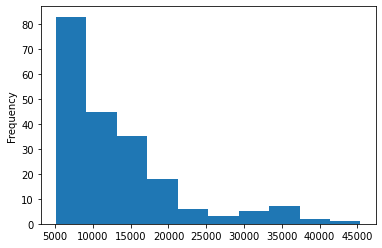

In [ ]:
df.price.plot(kind="hist")

In [ ]:
df.drop("price", axis=1).describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


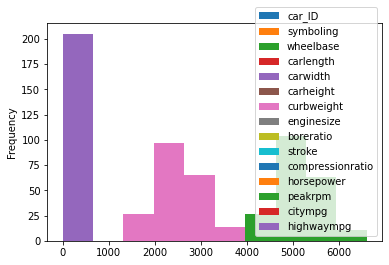

In [ ]:
df.drop("price", axis=1).plot(kind="hist")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc93911e250>,
      dtype=object)

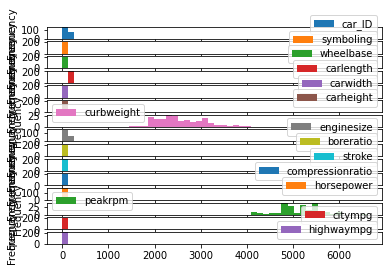

In [ ]:
df[numerical].plot(kind='hist',subplots=True,bins=50)

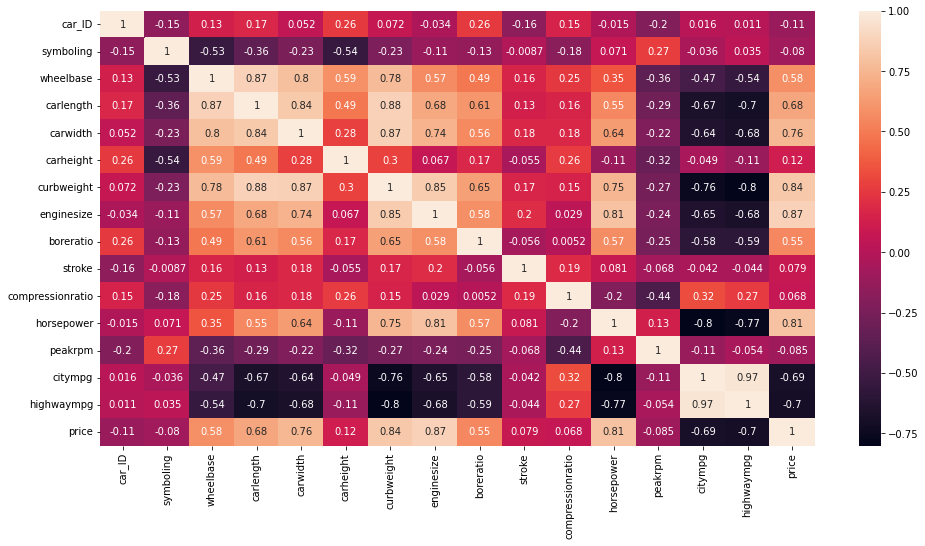

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data=df.corr(), annot=True);

In [ ]:
df.drop("citympg", axis=1, inplace=True)

In [ ]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,audi


In [ ]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc939181a90>],
      dtype=object)

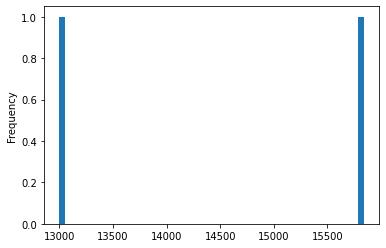

In [ ]:
print(df.groupby("fueltype").price.mean())
df.groupby("fueltype").price.mean().plot(kind="hist", subplots=True, bins=50)

In [ ]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc933e8c490>],
      dtype=object)

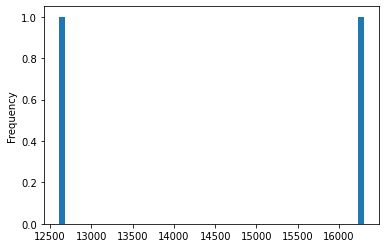

In [ ]:
print(df.groupby("aspiration").price.mean())
df.groupby("aspiration").price.mean().plot(kind="hist", subplots=True, bins=50)

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc933dc6c90>],
      dtype=object)

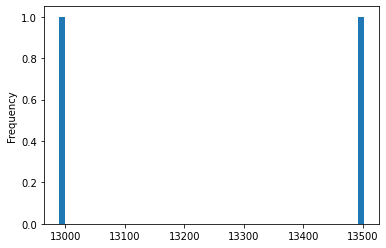

In [ ]:
print(df.groupby("doornumber").price.mean())
df.groupby("doornumber").price.mean().plot(kind="hist", subplots=True, bins=50)

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc933d81850>],
      dtype=object)

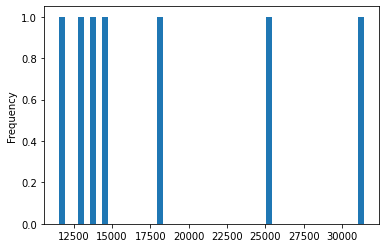

In [ ]:
print(df.groupby("enginetype").price.mean().sort_values())
df.groupby("enginetype").price.mean().plot(kind="hist", subplots=True, bins=50)

In [ ]:
print(df.groupby("model").price.mean().sort_values())


model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
toyota          9885.812500
volkswagen     10077.500000
nissan         10415.666667
mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64


In [ ]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)

# MODELLING


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
X = df.drop('price', axis=1)
y = df.price

TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Since we have dummy features MinMaxScaler will be a better choice of scaling for our features.
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ln_model = LinearRegression()
ln_model.fit(X_train_scaled, y_train)
y_pred = ln_model.predict(X_test_scaled)
y_train_pred = ln_model.predict(X_train_scaled)
ln_r2 = r2_score(y_test, y_pred)
ln_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

pd.options.display.float_format = '{:.3f}'.format
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.979,0.869
mae,858.912,1946.044
mse,1271079.445,9098339.161
rmse,1127.422,3016.345


# **Implementation of Linear regression From Scratch without using external libraries:**


In [ ]:
# collecting x & y
X = df['price'].values
Y = df['horsepower'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [ ]:
m = len(X)# total no.of input values

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.004000221192788035 
c = 51.007294175177805


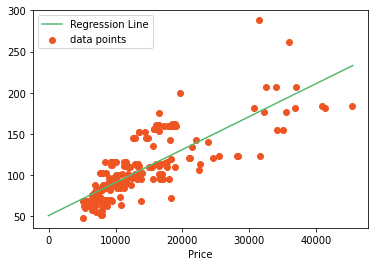

In [ ]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('Price')
plt.legend()
plt.show()

In [ ]:
df.groupby("price").size() 

price
5118.000     1
5151.000     1
5195.000     1
5348.000     1
5389.000     1
            ..
36880.000    1
37028.000    1
40960.000    1
41315.000    1
45400.000    1
Length: 189, dtype: int64

In [ ]:
# calculating R-squared value for measuring goodness of our model. 

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals
val_count=189
for i in range(int(val_count)): # val_count represents the no.of input x values
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.6629947526953365


The above code generates the R-squared value which is 0.6629.

# Implementation of MLR From Scratch without using external libraries:

In [ ]:
import numpy as np
import copy

class MultipleLinearRegression():
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):
        # prepare x and y values for coefficient estimates
        x = self._transform_x(x)
        y = self._transform_y(y)

        betas = self._estimate_coefficients(x, y)
        
        # intercept becomes a vector of ones
        self.intercept = betas[0]

        # coefficients becomes the rest of the betas
        self.coefficients = betas[1:]

    def predict(self, x):
        '''
            y = b_0 + b_1*x + ... + b_i*x_i
        '''
        predictions = []
        for index, row in x.iterrows():
            values = row.values

            pred = np.multiply(values, self.coefficients)
            pred = sum(pred)
            pred += self.intercept

            predictions.append(pred)

        return predictions

    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values = y_true.values
        y_average = np.average(y_values)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_values)):
            residual_sum_of_squares += (y_values[i] - y_pred[i])**2
            total_sum_of_squares += (y_values[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

    def _transform_x(self, x):
        x = copy.deepcopy(x)
        x.insert(0, 'ones', np.ones( (x.shape[0], 1) ))
        return x.values

    def _transform_y(self, y):
        y = copy.deepcopy(y)
        return y.values

    def _estimate_coefficients(self, x, y):
        '''
            β = (X^T X)^-1 X^T y
            Estimates both the intercept and all coefficients.
        '''
        xT = x.transpose()

        inversed = np.linalg.inv( xT.dot(x) )
        coefficients = inversed.dot( xT ).dot(y)

        return coefficients

In [ ]:
def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values = y_true.values
        y_average = np.average(y_values)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_values)):
            residual_sum_of_squares += (y_values[i] - y_pred[i])**2
            total_sum_of_squares += (y_values[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df[['compressionratio', 'enginesize', 'horsepower','wheelbase']]
y = df['price']
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

predicted = regr.predict(x_test)
score = r2_score(y_test, pred)
print(f'Our Final R^2 score: {score}')

Our Final R^2 score: 0.8114506160954164


In [ ]:
x = df[['compressionratio', 'enginesize', 'horsepower','wheelbase']]
y = df['price']
# from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
import mlr_class 
from mlr_class import MultipleLinearRegression
from sklearn.linear_model import LinearRegression

mlr = MultipleLinearRegression()

# fit our LR linear regression line to our data
mlr.fit(x_train, y_train)

# make predictions and get our r2  score
pred = mlr.predict(x_test)

# calculate r2_score
score = mlr.r2_score(y_test, pred)
print(f'Our Final R^2 score: {score}')
#r2 score is 

Our Final R^2 score: 0.8114506160954162


The above implementation of MLR displays the r squared score for this model. 

# Comparison and Random Forest.

In [ ]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df.drop(['price'], axis=1).select_dtypes('number').columns

# X= df.drop('price', axis=1)
# y= df['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]


In [ ]:
for model in models:
    ct = make_column_transformer((s,numerical2),(p,['compressionratio', 'enginesize', 'horsepower', 'wheelbase',
       'carwidth']),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 10078.14, r2 score is -0.45
model : Lasso() and  rmse score is : 10705.77, r2 score is -0.64
model : ElasticNet() and  rmse score is : 9220.0, r2 score is -0.21
model : KNeighborsRegressor() and  rmse score is : 9549.56, r2 score is -0.3


,RMSE,R2_Test
Ridge,10078.140,-0.450
Lasso,10705.770,-0.640
ElasticNet,9220.000,-0.210
KNeighbors,9549.560,-0.300


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.852,-0.293
mae,2140.041,6813.933
mse,8929057.962,90554617.338
rmse,2988.153,9516.019


# Model deployment

In [ ]:
import pickle
pickled_model=pickle.dump(regr, open('model_car3.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model_car3.pkl', 'rb'))

pickled_model.predict(x_test)

# FINAL MODEL USED - MLR FROM SCRATCH

# THESE RESULTS ARE THE CAR PRICES SCALED DOWN BY 100

array([ 7391.15590242,  9866.18105272, 11068.56671406, 10628.73118538,
        7735.64797324, 11068.56671406, 19244.22844781, 20780.32653303,
       15579.34188247, 20024.63116522, 17761.13624831, 17402.97541085,
       14062.88984143, 11057.75854057, 38911.92741268,  5184.53999128,
        7391.15590242, 13353.37066632, 16808.59192584, 17616.70295897,
       16556.25966705, 16556.25966705, 24536.14088833,  6198.1319631 ,
       15579.34188247, 21650.84439316, 17616.70295897, 23628.48961099,
       12042.81752706, 10756.45697784,  6350.7846364 , 26823.43448803,
       20736.72266722, 21376.56669907, 14227.39783077, 13074.91532818,
       13353.37066632, 15579.34188247,  7015.48307786, 12651.2877704 ,
       36372.58007166, 12102.35547838,  7391.15590242, 10749.01114366,
        4847.73194371, 11562.55878139,  6198.1319631 , 11925.89032451,
        9180.31601113, 10496.37992588,  6039.72207502, 15579.34188247,
        7089.93675711, 11310.30760296, 16011.8193066 ,  9994.79052408,
      